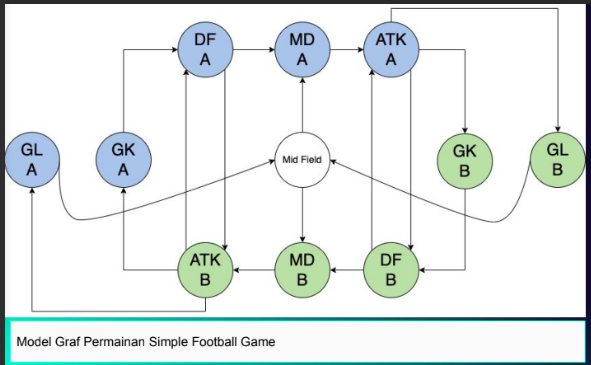

# Perhitungan Skill

In [ ]:
class DotDict:
    def __init__(self, dictionary):
        self.dictionary = dictionary

    def __getattr__(self, item):
        if item in self.dictionary:
            value = self.dictionary[item]
            if isinstance(value, dict):
                return DotDict(value)
            return value
        raise AttributeError(f"'{type(self).__name__}' object has no attribute '{item}'")

timA = DotDict({
      "tim":"A",
      "gk":{
          "mentality":80,
          "save":81
      },
      "df":{
          "mentality":79,
          "tackle":79,
          "passing":78,
      },
      "md":{
          "mentality":78,
          "tackle":60,
          "dribble":76,
      },
      "atk":{
          "mentality":77,
          "dribble":80,
          "intercept":85,
          "shoot":92
      }
  })
timB = DotDict({
    "tim":"B",
    "gk": {
        "mentality": 77,
        "save": 86,
    },
    "df": {
        "mentality": 78,
        "tackle": 80,
        "passing": 81,
    },
    "md": {
        "mentality": 79,
        "tackle": 70,
        "dribble": 70,
    },
    "atk": {
        "mentality": 80,
        "dribble": 81,
        "intercept": 86,
        "shoot": 90,
    }
})


In [ ]:
import random as rand
ka = 100000
kb = 115000

a=lambda E:rand.uniform(0,.25)*E/100
b=lambda ka,kb:rand.uniform(0,.25)*ka/(ka+kb)
S=lambda a,b,s0:s0*(1-(a+b))
skill = lambda E,s0: S(a(E),b(ka,kb),s0)

In [ ]:
bola = "MD Home"
home = timA
away = timB
gol = {
    "A":0,
    "B":0
}
t = 0

while t<90:
  # bola = "MD Home"
  dribbleMdHome = skill(home.md.mentality,home.md.dribble)
  t=t+1
  tackleMdAway = skill(away.md.mentality,away.md.tackle)
  t=t+2
  event1 = dribbleMdHome > tackleMdAway
  # print("Bola dipegang oleh",bola)
  # print("MD Home vs MD Away",event1)
  if event1:
    home = timA
    away = timB
    # bola = "ATK Home"
    dribbleAtkHome = skill(home.atk.mentality,home.atk.dribble)
    t=t+1
    tackleDfAway = skill(away.df.mentality,away.df.tackle)
    t=t+2
    event2 = dribbleAtkHome > tackleDfAway
    # print("Bola dipegang oleh",bola)
    # print("Atk Home vs Df Away",event2)
    if event2:
      home = timA
      away = timB
      # bola="ATK Home"
      shootAtkHome = skill(home.atk.mentality,home.atk.shoot)
      t=t+2
      saveGkAway = skill(away.df.mentality,away.gk.save)
      t=t+3
      event3 = shootAtkHome > saveGkAway
      # print("Bola dipegang oleh",bola)
      # print("Atk Home vs GK Away",event3)
      # print("ATK SHOOT!")
      if event3:
        # print("GOLLLLL! JEBRET")
        # print(bola)
        gol[home.tim] = gol[home.tim] + 1
        # print(away.tim)
        #home berubah jadi tim lawan
        #away berbuah jadi tim kawan
        home = timB
        away = timA
      else:
        bola = "DF Away"
        # print("Bola dipegang oleh",bola)
        home = timB
        away = timA
  else:
    bola = "ATK Away"
    # print("Bola dipegang oleh",bola)
    home = timB
    away = timA

In [ ]:
print("Skor A =",gol["A"])
print("Skor B =",gol["B"])

Skor A = 5
Skor B = 0
